# 다변량 데이터 탐색

In [1]:
import pandas as pd
data=pd.read_csv('데이터/Ex_CEOSalary.csv',encoding='utf-8')

In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
data['industry']=data['industry'].replace([1,2,3,4],['Service','IT','Finance','Other'])

<AxesSubplot:ylabel='industry'>

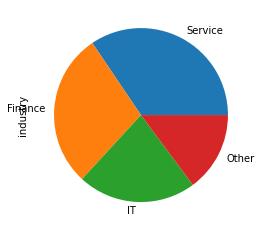

In [8]:
# % matplotlib inline
data['industry'].value_counts().plot(kind='pie')

In [9]:
data.skew()

C:\Users\hkyoo52\AppData\Local\Temp\ipykernel_10520\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

<AxesSubplot:>

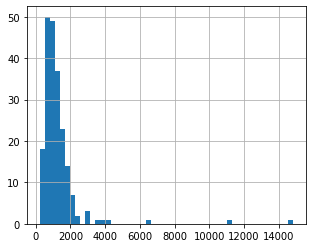

In [15]:
import matplotlib.pyplot as plt
data['salary'].hist(bins=50,figsize=(5,4))

# 이변량 데이터 탐색

In [8]:
import pandas as pd
data=pd.read_csv('../데이터/Ex_CEOSalary.csv',encoding='utf-8')
data['industry']=data['industry'].replace([1,2,3,4],['Service','IT','Finance','Other'])

In [9]:
# 상관관계
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


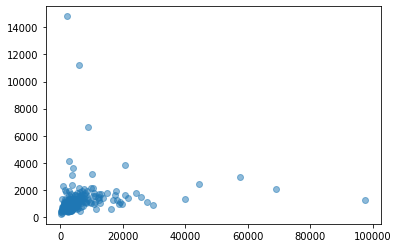

In [10]:
# 산점도
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'],alpha=0.5)
plt.show()

In [11]:
# 기술통계
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Other      31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Other      1100.0  
Service    3844.0

# 이상치 처리

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x00000147553A2B00>, <matplotlib.lines.Line2D object at 0x00000147553A2DD0>, <matplotlib.lines.Line2D object at 0x00000147553A3EB0>, <matplotlib.lines.Line2D object at 0x00000147553E01C0>], 'caps': [<matplotlib.lines.Line2D object at 0x00000147553A30A0>, <matplotlib.lines.Line2D object at 0x00000147553A3370>, <matplotlib.lines.Line2D object at 0x00000147553E0490>, <matplotlib.lines.Line2D object at 0x00000147553E0760>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000147553A2830>, <matplotlib.lines.Line2D object at 0x00000147553A3BE0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000147553A3640>, <matplotlib.lines.Line2D object at 0x00000147553E0A30>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000147553A3910>, <matplotlib.lines.Line2D object at 0x00000147553E0D00>], 'means': []})

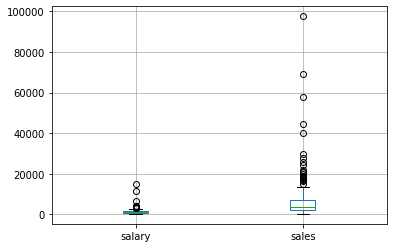

In [16]:
data.boxplot(column=['salary','sales'],return_type='both')

In [18]:
Q1=data['salary'].quantile(q=0.25)
Q3=data['salary'].quantile(q=0.75)
IQR=Q3-Q1
IQR


671.0

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

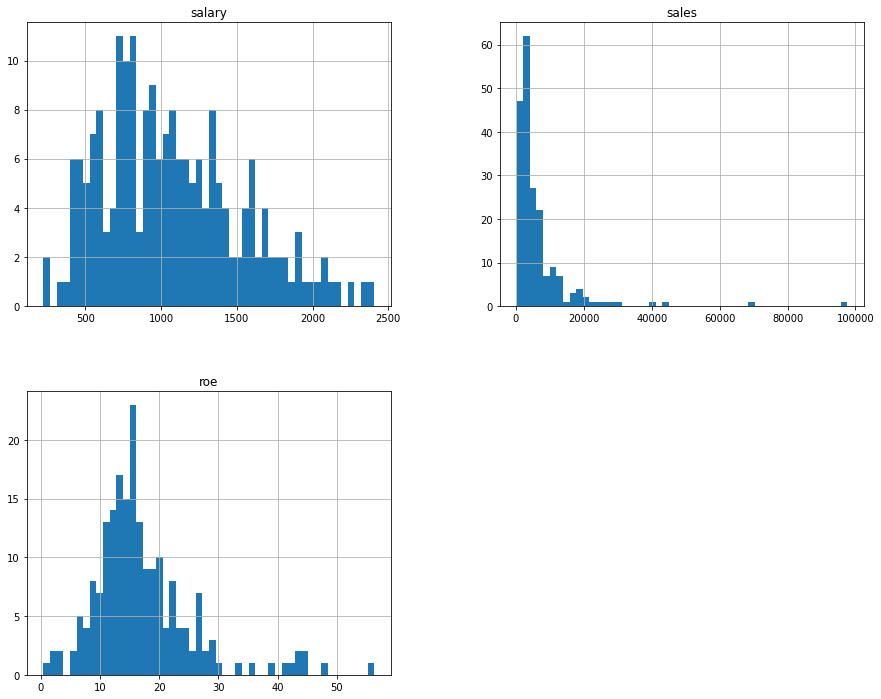

In [27]:
data_IQR=data[(Q1-1.5*IQR<data['salary']) * (data['salary']<Q3+1.5*IQR)]
data_IQR.hist(bins=50, figsize=(15,12))

# 변수 변환

In [29]:
# 로그 변환
import numpy as np
data['log_salary']=np.log(data['salary'])
data['log_sales']=np.log(data['sales'])
data['log_roe']=np.log(data['roe'])

In [31]:
# 제곱근 변환
import numpy as np
data['sqrt_salary']=np.log(data['salary'])
data['sqrt_sales']=np.log(data['sales'])
data['sqrt_roe']=np.log(data['roe'])

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

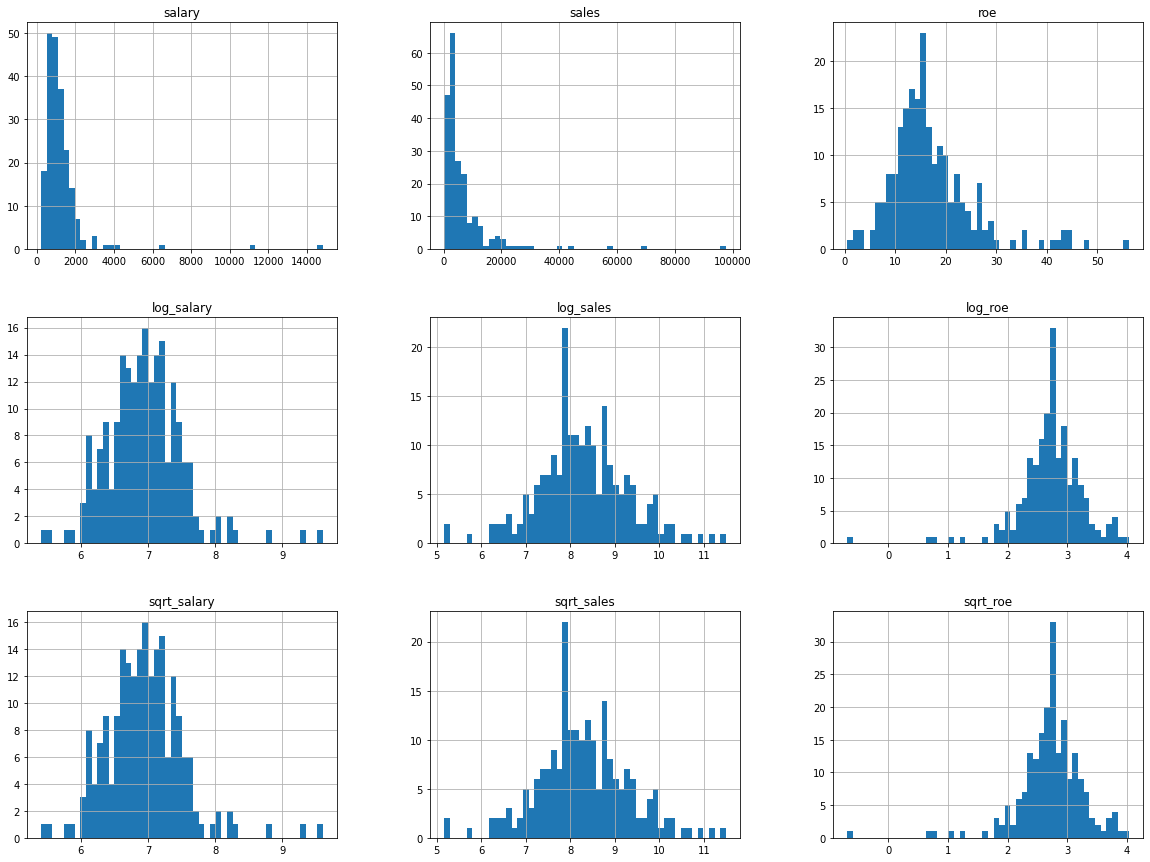

In [32]:
data.hist(bins=50,figsize=(20,15))

# 결측치 처리

In [1]:
import pandas as pd
data=pd.read_csv('../데이터/Ex_Missing.csv')

In [2]:
# 결측치 확인
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [3]:
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [4]:
# 행 단위 결측치 개수 구하기
data['missing']=data.isnull().sum(1)   # 행 단위 결측치 개수
data['valid']=data.notnull().sum(1)    # 행 단위 결측치 아닌거 개수
data

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
1,NaN,9958.000000,10.900000,1,1,4
2,NaN,6125.899902,23.500000,1,1,4
3,578.0,16246.000000,5.900000,1,0,5
4,1368.0,NaN,13.800000,1,1,4
5,1145.0,NaN,20.000000,2,1,4
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5
9,833.0,2830.000000,NaN,2,1,4


In [5]:
# 결측치 제거
data_del_row=data.dropna(axis=0)
data_del_row

,salary,sales,roe,industry,missing,valid
0,1095.0,27595.000000,14.100000,1,0,5
3,578.0,16246.000000,5.900000,1,0,5
6,1078.0,2266.699951,16.400000,2,0,5
7,1094.0,2966.800049,16.299999,2,0,5
8,1237.0,4570.200195,10.500000,2,0,5


In [6]:
data_del_col=data.dropna(axis=1)
data_del_col

,industry,missing,valid
0,1,0,5
1,1,1,4
2,1,1,4
3,1,0,5
4,1,1,4
5,2,1,4
6,2,0,5
7,2,0,5
8,2,0,5
9,2,1,4


In [7]:
data[['salary','sales','roe','industry']].dropna(axis=0)

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [8]:
# 결측치값 대체
data=pd.read_csv('../데이터/Ex_Missing.csv')
data_0=data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [9]:
data_missing=data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [10]:
# method -> ffill : 바로 앞 값으로 결측값 대체, bfill : 바로 뒤에 값으로 결측값 대체
data_ffill=data.fillna(method='ffill')
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [11]:
# 각 컬럼당 평균, 중위값, 최소, 최대 대체
fill_mean=data.fillna(data.mean())
fill_median=data.fillna(data.median())
fill_min=data.fillna(data.min())

In [22]:
data_other_mean=data.fillna(data.mean()['salary'])
data_other_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


In [18]:
# 다른 변수 값으로 대체 (np.where(조건문,만족시 값, False시 값))
import numpy as np
import copy
data2=copy.deepcopy(data)
data2['sales_new']=np.where(data['sales'].notnull()==True,data['sales'],data['salary'])
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


# 데이터정제

In [1]:
import pandas as pd
data=pd.read_csv('../데이터/house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [2]:
# 선형회귀 적용 (정제 전 데이터)
from sklearn.model_selection import train_test_split

X=data[data.columns[:5]]
Y=data[['house_value']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=52)


In [3]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max=min_max.fit(X_train)
X_scaled_train=min_max.transform(X_train)
X_scaled_test=min_max.transform(X_test)

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_train,y_train)

LinearRegression()

In [7]:
model.score(X_scaled_train,y_train)

0.5167502712482379

In [6]:
model.score(X_scaled_test,y_test)

0.5302081826221903

In [10]:
pred_test=model.predict(X_scaled_test)
pred_test

array([[215617.02307986],
       [249184.29838105],
       [280689.36890492],
       ...,
       [164259.38867655],
       [109946.87257429],
       [171883.4517314 ]])

<AxesSubplot:>

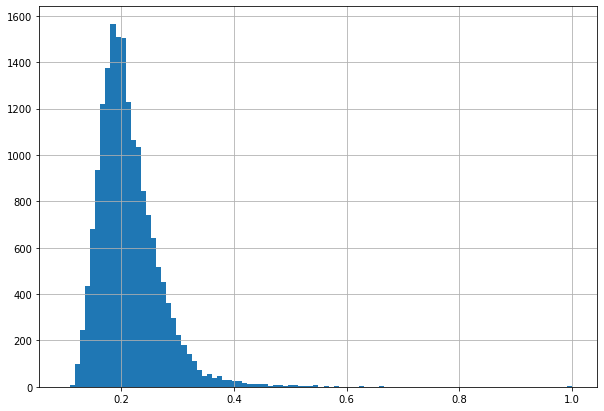

In [15]:
# 데이터 정제
data['bedrooms'].hist(bins=100,figsize=(10,7))

전체 데이터 :  17914
0.5 이상 데이터 :  48


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

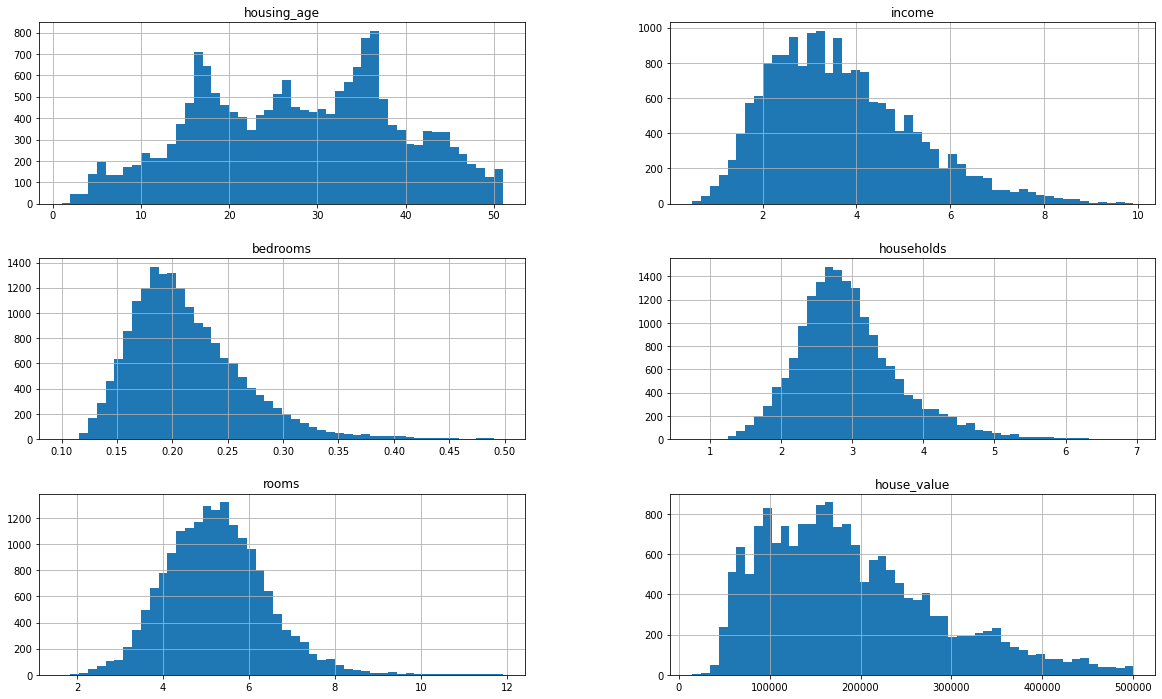

In [40]:
# bedrooms가 0.5 이상 값 거의 존재 X -> 삭제
print('전체 데이터 : ', len(data))
print('0.5 이상 데이터 : ', (data['bedrooms']>0.5).sum())
new_data=data[(data['bedrooms']<0.5)*(data['households']<7)*(data['rooms']<12)]
new_data.hist(bins=50, figsize=(20,12))

In [44]:
new_data.columns

Index(['housing_age', 'income', 'bedrooms', 'households', 'rooms',
       'house_value'],
      dtype='object')

In [48]:
# 선형 회귀 (데이터 정제 후)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

X=new_data[new_data.columns[:5]]
y=new_data[['house_value']]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=52)

min_max=MinMaxScaler()
min_max.fit(X_train)

X_scaled_train = min_max.transform(X_train)
X_scaled_test = min_max.transform(X_test)

model=LinearRegression()
model.fit(X_scaled_train,y_train)

print('훈련 데이터 정확도 : ', model.score(X_scaled_train,y_train))
print('테스트 데이터 정확도 : ', model.score(X_scaled_test,y_test))

훈련 데이터 정확도 :  0.5749416066017271
테스트 데이터 정확도 :  0.5694364260143877
